<a href="https://colab.research.google.com/github/BNarayanaReddy/CS7015/blob/main/Chapter6_AutoEncoders_Denoising_SparseAEs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import torchvision
from torch.utils.data import random_split, DataLoader
import torch.nn as nn
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split

In [2]:
from PIL import Image

In [3]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [4]:
# Dataset
dataset = torchvision.datasets.FashionMNIST(root='FashionMNIST/raw/t10k-images-idx3-ubyte', transform=transform, download = True)

In [5]:
dataset[1][1]

0

In [6]:
import matplotlib.pyplot as plt

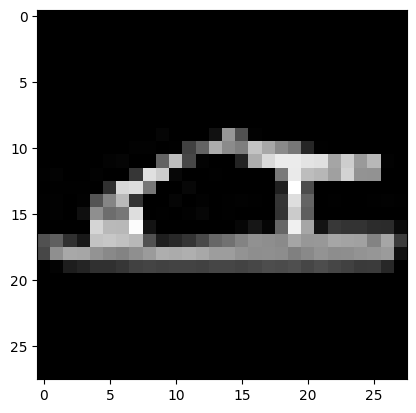

In [7]:
plt.imshow(dataset[120][0].squeeze(0), cmap='gray') # chappal

In [8]:
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [9]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [10]:
# # load one
# iterator = iter(train_dataloader)
# img = next(iterator)

#### UnderComplete AutoEncoder

In [11]:
# Build AE model (Undercomplte)
class UnderComplete(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(UnderComplete, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.hidden_layer = nn.Linear(input_size, hidden_size)
    self.output_layer = nn.Linear(hidden_size, input_size)
    self.relu = nn.ReLU() # bcoz, the inputs are always positive or 0

  def forward(self, x):
    x = x.view(-1, self.input_size) # 28*28
    x = self.hidden_layer(x)
    x = self.relu(x)
    x = self.output_layer(x)
    x = self.relu(x)
    return x

In [12]:
under_completeAE = UnderComplete(28*28, 100) # 784 -> 100 -> 784
under_completeAE

UnderComplete(
  (hidden_layer): Linear(in_features=784, out_features=100, bias=True)
  (output_layer): Linear(in_features=100, out_features=784, bias=True)
  (relu): ReLU()
)

In [13]:
from torch.optim import Adam

In [14]:
mse_loss = nn.MSELoss()

In [15]:
# Training
def fit_undercompleteAE(epochs = 10, lr = 1e-3, eps = 1e-8):
  optimizer = Adam(under_completeAE.parameters(), lr=lr, eps = eps)
  for epoch in range(1, epochs+1):
    epoch_loss= 0
    for step, (x, y) in enumerate(train_dataloader):
      optimizer.zero_grad()

      x = x.view(-1, 28*28)
      # fwd prop
      x_hat = under_completeAE(x)
      # loss
      loss = mse_loss(x, x_hat)
      # back prop
      loss.backward()
      # update
      optimizer.step()
      with torch.no_grad():
        epoch_loss += loss


    print(f"Loss: {epoch}", epoch_loss/len(train_dataloader))

In [16]:
fit_undercompleteAE()

Loss: 1 tensor(0.0327)
Loss: 2 tensor(0.0206)
Loss: 3 tensor(0.0192)
Loss: 4 tensor(0.0186)
Loss: 5 tensor(0.0183)
Loss: 6 tensor(0.0181)
Loss: 7 tensor(0.0180)
Loss: 8 tensor(0.0179)
Loss: 9 tensor(0.0178)
Loss: 10 tensor(0.0177)


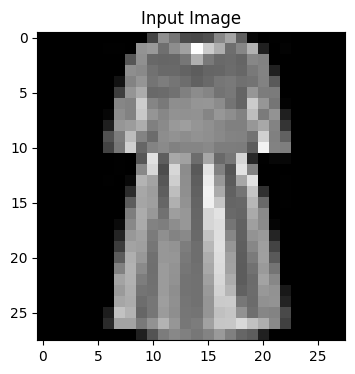

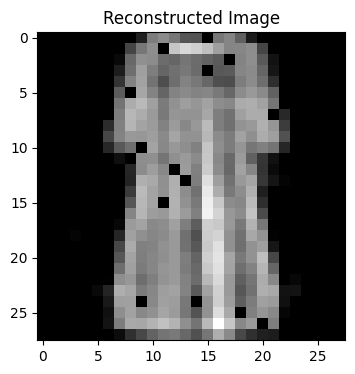

In [17]:
for batch in test_dataloader:
  plt.figure(figsize=(12, 4))
  under_completeAE.eval()
  x = batch[0][10]
  plt.subplot(1, 2, 1)
  plt.imshow(x.squeeze(), cmap='grey')
  plt.title("Input Image")
  plt.show()
  # Fwd Prop
  x_hat = under_completeAE(x.view(-1, 28*28))
  x_hat = x_hat.view(-1, 28, 28)
  # detach from comp. graph
  x_hat = x_hat.detach()
  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 2)
  plt.imshow(x_hat.squeeze(), cmap='grey')
  plt.title("Reconstructed Image")
  plt.show()
  break

#### OverComplete AutoEncoder

In [18]:
# Build AE model (Overcomplte)
class OverComplete(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(OverComplete, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.hidden_layer = nn.Linear(input_size, hidden_size)
    self.output_layer = nn.Linear(hidden_size, input_size)
    self.relu = nn.ReLU() # bcoz, the inputs are always positive or 0

  def forward(self, x):
    x = x.view(-1, self.input_size) # 28*28
    x = self.hidden_layer(x)
    x = self.relu(x)
    x = self.output_layer(x)
    x = self.relu(x)
    return x

In [19]:
over_completeAE = OverComplete(28*28, 900) # 784 -> 900 -> 784
over_completeAE

OverComplete(
  (hidden_layer): Linear(in_features=784, out_features=900, bias=True)
  (output_layer): Linear(in_features=900, out_features=784, bias=True)
  (relu): ReLU()
)

In [20]:
# Training
def fit_over_completeAE(epochs = 10, lr = 1e-3, eps = 1e-8):
  optimizer = Adam(over_completeAE.parameters(), lr=lr, eps = eps)
  for epoch in range(1, epochs+1):
    epoch_loss= 0
    for step, (x, y) in enumerate(train_dataloader):
      optimizer.zero_grad()

      x = x.view(-1, 28*28)
      # fwd prop
      x_hat = over_completeAE(x)
      # loss
      loss = mse_loss(x, x_hat)
      # back prop
      loss.backward()
      # update
      optimizer.step()
      with torch.no_grad():
        epoch_loss += loss
      # print(loss)

    print(f"Loss: {epoch}", epoch_loss/len(train_dataloader))

In [21]:
fit_over_completeAE()

Loss: 1 tensor(0.0255)
Loss: 2 tensor(0.0182)
Loss: 3 tensor(0.0172)
Loss: 4 tensor(0.0167)
Loss: 5 tensor(0.0164)
Loss: 6 tensor(0.0162)
Loss: 7 tensor(0.0161)
Loss: 8 tensor(0.0160)
Loss: 9 tensor(0.0160)
Loss: 10 tensor(0.0159)


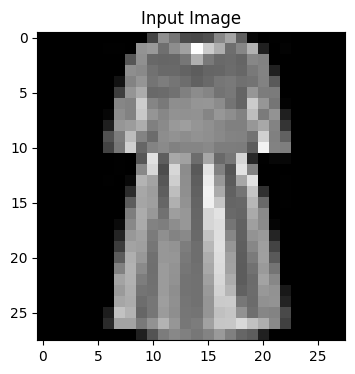

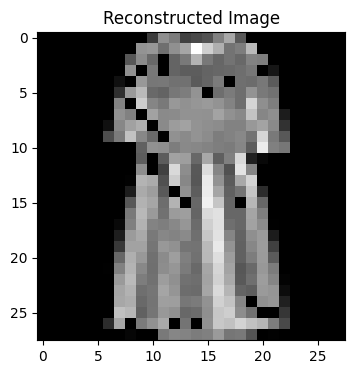

In [22]:
# Not performed well on the test dataset even the train loss is less
# Denoising, Sparsing, Tying, and Contrastive methods can be implemented to better perform the overcomplete AE
for batch in test_dataloader:
  plt.figure(figsize=(12, 4))
  over_completeAE.eval()
  x = batch[0][10]
  plt.subplot(1, 2, 1)
  plt.imshow(x.squeeze(), cmap='grey')
  plt.title("Input Image")
  plt.show()
  # Fwd Prop
  x_hat = over_completeAE(x.view(-1, 28*28))
  x_hat = x_hat.view(-1, 28, 28)
  # detach from comp. graph
  x_hat = x_hat.detach()
  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 2)
  plt.imshow(x_hat.squeeze(), cmap='grey')
  plt.title("Reconstructed Image")
  plt.show()
  break

#### Denoising of AE
- Perform the corruption of input data by randomly adding the gaussion noise or randomly switching to zeros

In [23]:
DAE = OverComplete(28*28, 900) # 784 -> 900 -> 784
DAE

OverComplete(
  (hidden_layer): Linear(in_features=784, out_features=900, bias=True)
  (output_layer): Linear(in_features=900, out_features=784, bias=True)
  (relu): ReLU()
)

In [24]:
# Training
def fit_DAE(epochs = 10, lr = 1e-3, eps = 1e-8):
  optimizer = Adam(DAE.parameters(), lr=lr, eps = eps)
  for epoch in range(1, epochs+1):
    epoch_loss= 0
    for step, (x, y) in enumerate(train_dataloader):
      optimizer.zero_grad()

      x = x.view(-1, 28*28)
      # add guassian noise
      x_noise = x + torch.randn_like(x)*0.2
      # fwd prop
      x_hat = DAE(x_noise)
      # loss
      loss = mse_loss(x, x_hat)
      # back prop
      loss.backward()
      # update
      optimizer.step()
      with torch.no_grad():
        epoch_loss += loss
      # print(loss)

    print(f"Loss: {epoch}", epoch_loss/len(train_dataloader))

In [25]:
fit_DAE()

Loss: 1 tensor(0.0232)
Loss: 2 tensor(0.0175)
Loss: 3 tensor(0.0167)
Loss: 4 tensor(0.0157)
Loss: 5 tensor(0.0152)
Loss: 6 tensor(0.0151)
Loss: 7 tensor(0.0150)
Loss: 8 tensor(0.0150)
Loss: 9 tensor(0.0145)
Loss: 10 tensor(0.0144)


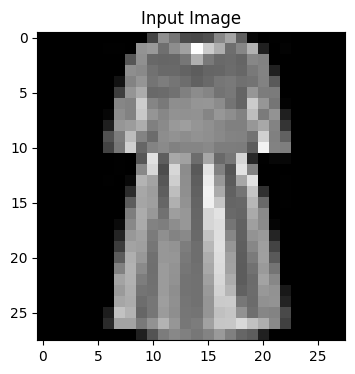

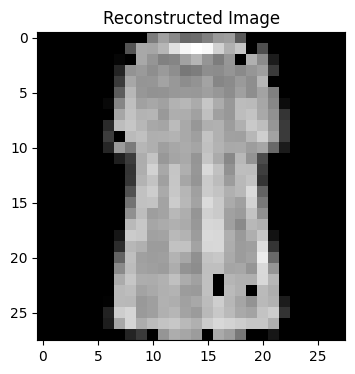

In [26]:
# Denoised
for batch in test_dataloader:
  plt.figure(figsize=(12, 4))
  DAE.eval()
  x = batch[0][10]
  plt.subplot(1, 2, 1)
  plt.imshow(x.squeeze(), cmap='grey')
  plt.title("Input Image")
  plt.show()
  # Fwd Prop
  x_hat = DAE(x.view(-1, 28*28))
  x_hat = x_hat.view(-1, 28, 28)
  # detach from comp. graph
  x_hat = x_hat.detach()
  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 2)
  plt.imshow(x_hat.squeeze(), cmap='grey')
  plt.title("Reconstructed Image")
  plt.show()
  break

#### Sparsing of AE
- Sparsity parameter rrho -> a hyper param usually taken between 0 to 0.2

In [27]:
# Build AE model (Overcomplte)
class SparseAE(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(SparseAE, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.hidden_layer = nn.Linear(input_size, hidden_size)
    self.output_layer = nn.Linear(hidden_size, input_size)
    self.sigmoid = nn.Sigmoid() # bcoz, the inputs are always positive or 0
    self.relu = nn.ReLU()

  def forward(self, x):
    x = x.view(-1, self.input_size) # 28*28
    x = self.hidden_layer(x)
    x = self.sigmoid(x)
    avg_activation = torch.mean(x, dim=0)
    x = self.output_layer(x)
    x = self.relu(x)
    return x, avg_activation


In [28]:
SAE = SparseAE(28*28, 900)

In [29]:
bce = nn.BCELoss()

In [30]:
# Training - It requires more epochs for better perf.
def fit_SparseAE(epochs = 10, lr = 1e-3, eps = 1e-8, sparsity_rho = 0.05, alpha = 0.3):
  optimizer = Adam(SAE.parameters(), eps = eps, lr=lr)
  for epoch in range(1, epochs+1):
    epoch_loss= 0
    for step, (x, y) in enumerate(train_dataloader):
      optimizer.zero_grad()

      x = x.view(-1, 28*28)
      # fwd prop
      x_hat, avg_activation = SAE(x)
      # loss
      reconstruction_loss = mse_loss(x, x_hat)
      # print(avg_activation.shape)

      sparsity_tensor = torch.ones_like(avg_activation)*sparsity_rho
      # print(sparsity_rho)
      sparse_loss = bce(avg_activation, sparsity_tensor)

      loss = (1-alpha)*reconstruction_loss + alpha*sparse_loss
      # back prop
      loss.backward()
      # update
      optimizer.step()
      with torch.no_grad():
        epoch_loss += loss
      # print(loss)

    print(f"Loss: {epoch}", epoch_loss/len(train_dataloader))

In [31]:
fit_SparseAE()

Loss: 1 tensor(0.1001)
Loss: 2 tensor(0.0799)
Loss: 3 tensor(0.0753)
Loss: 4 tensor(0.0726)
Loss: 5 tensor(0.0712)
Loss: 6 tensor(0.0704)
Loss: 7 tensor(0.0698)
Loss: 8 tensor(0.0694)
Loss: 9 tensor(0.0691)
Loss: 10 tensor(0.0688)


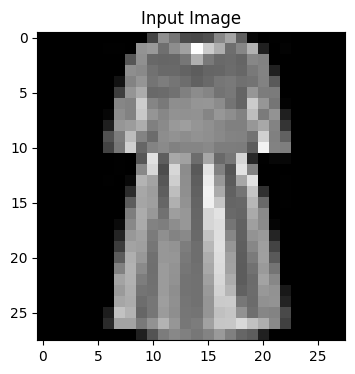

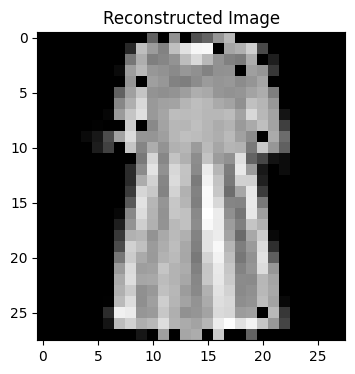

In [32]:
# Sparse AutoEncoders
for batch in test_dataloader:
  plt.figure(figsize=(12, 4))
  SAE.eval()
  x = batch[0][10]
  plt.subplot(1, 2, 1)
  plt.imshow(x.squeeze(), cmap='grey')
  plt.title("Input Image")
  plt.show()
  # Fwd Prop
  x_hat, activation_avg = SAE(x.view(-1, 28*28))
  x_hat = x_hat.view(-1, 28, 28)
  # detach from comp. graph
  x_hat = x_hat.detach()
  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 2)
  plt.imshow(x_hat.squeeze(), cmap='grey')
  plt.title("Reconstructed Image")
  plt.show()
  break